# Рабочая тетрадь № 4
## Лосев Антон ИКБО-02-21

### 1.1.1 Пример
Проведем прямую 𝑦 = 𝑚𝑥 + 𝑏 через экспериментальные точки

In [2]:
import numpy as np

x = np.array([0, 1, 2, 3])
y = np.array([-1, 0.2, 0.9, 2.1])

# Перепишем линейное уравнение y = mx + c как y = Ap, где A = [[ x 1]] и p = [[m], [c]]
# Построим A по x:
A = np.vstack([x, np.ones(len(x))]).T
A

array([[0., 1.],
       [1., 1.],
       [2., 1.],
       [3., 1.]])

In [3]:
# Используем метод lstsq для решения его относительно вектора p
m, c = np.linalg.lstsq(A, y, rcond=None)[0]
print(m, c)

0.9999999999999999 -0.9499999999999997


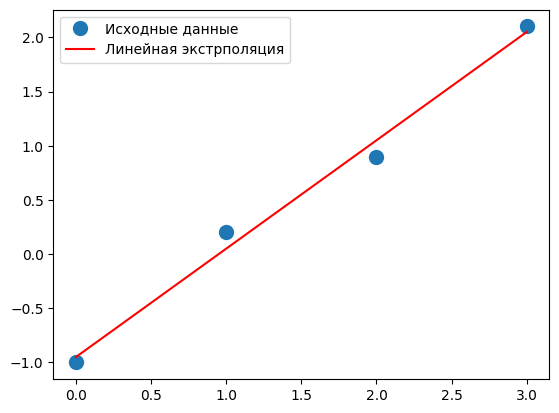

In [4]:
# Построим график полученной прямой и укажем на нем точки
import matplotlib.pyplot as plt
plt.plot(x, y, 'o', label='Исходные данные', markersize=10)
plt.plot(x, m*x + c, 'r', label='Линейная экстрполяция')
plt.legend()
plt.show()

### 1.1.2 Пример
Пусть 𝑥, 𝑦 – вектора длиной 𝑛 > 3 (точек > 3). Задача заключается в построении эстраполяционного полинома второго порядка (параболы). Таким образом, необходимо найти такие коэффициенты поринома 𝑎, 𝑏, 𝑐 по методу
наименьших квадратов. Данные мтогут быть получены в результате измерений. Покажем пример генерации данных случайным образом и загрузки их из файла

[-4.58963661 -3.57025634 -2.90145459 -2.35706614 -0.95690318 -0.40953325
  1.14555658  2.17258955  2.58442566  4.15290542  5.38368977]
[24.55414864 16.07361618  8.50290548  3.87100211  0.99574289  0.09719873
  1.22724495  4.43029427  8.59440308 16.09968341 24.84251377]


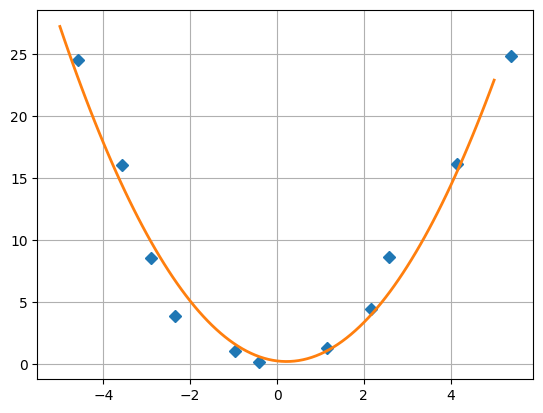

In [5]:
from numpy import *
from numpy.random import *

# Генерируем случайные x и y
delta = 1.0
x = linspace(-5, 5, 11)
y = x ** 2 + delta * (rand(11) - 0.5)
x += delta * (rand(11) - 0.5)

# Записываем данные в файл
x.tofile('x_data.txt', '\n')
y.tofile('y_data.txt', '\n')

# Читаем данные из файла
x = fromfile('x_data.txt', float, sep='\n')
y = fromfile('y_data.txt', float, sep='\n')

print(x)
print(y)

# Нахождение коэффициентов функции вида y = ax^2 + bx + c методом наименьших квадратов
# Задаем вектор m = [x**2, x, E]
m = vstack((x ** 2, x, ones(11))).T
# Находим коэффициенты при составляющих вектора m
s = np.linalg.lstsq(m, y, rcond = None)[0]

# На отрезке [-5, 5]
x_prec = linspace(-5, 5, 101)
# Рисуем точки
plt.plot(x, y, 'D')
# Рисуем кривую вида y - ax^2 + bx + c, подставляя из решения коэффициенты s[0], s[1], s[2]
plt.plot(x_prec, s[0] * x_prec ** 2 + s[1] * x_prec + s[2], '-', lw = 2)
plt.grid()
plt.savefig('парабола.png')

### 1.1.3 Пример
По данным предыдущего примера постройте эстраполяционного полинома третьего порядка

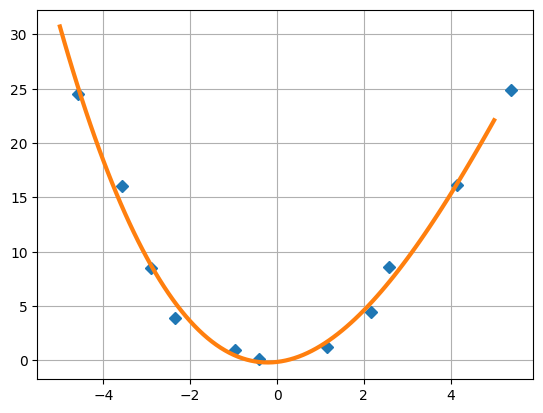

In [6]:
# Находим коэффициенты функции вида ax^3 + bx^2 + cx + d методом наименьших интерваолов
# Задаем вектор m = [x **3, x, E]
m = vstack((x ** 3, x ** 2, x, ones(11))).T
# Находим коэффициенты при составляющих вектора m
s = np.linalg.lstsq(m, y, rcond = None)[0]

# На отрезке [-5, 5]
x_prec = linspace(-5, 5, 101)
# Рисуем точки
plt.plot(x, y, 'D')
# Рисуем кривую вида ax^3 + bx^2 + cx + d, подставляя из решения коэффициенты s[0], s[1], s[2], s[3]
plt.plot(x_prec, s[0] * x_prec ** 3 + s[1] * x_prec ** 2 + s[2] * x_prec + s[3], '-', lw = 3)
plt.grid()
plt.savefig('полином 3-й степени.png')

### 1.1.3 Задание
Представьте собственные данные и постройте эктраполяцию полиномами первой, второй и третьей степени.

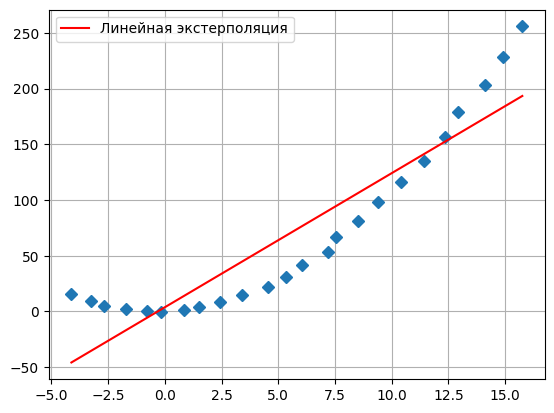

In [7]:
# Генерируем случайные x и y
delta = 0.6
dotCounter = 24
# На отрезке [-4, 16]
x = linspace(-4, 16, dotCounter)
y = x ** 2 + delta * (rand(dotCounter) - 1.1)
x += delta * (rand(dotCounter) - 1.1)

# Находим коэффициенты функции вида ax + b методом наименьших интерваолов
# Задаем вектор m = [x, E]
m = vstack([x, np.ones(dotCounter)]).T
m, c = np.linalg.lstsq(m, y, rcond = None)[0]

plt.plot(x, y, 'D')
plt.plot(x, m * x + c, 'r', label = 'Линейная экстерполяция')

plt.legend()
plt.grid()
plt.show()

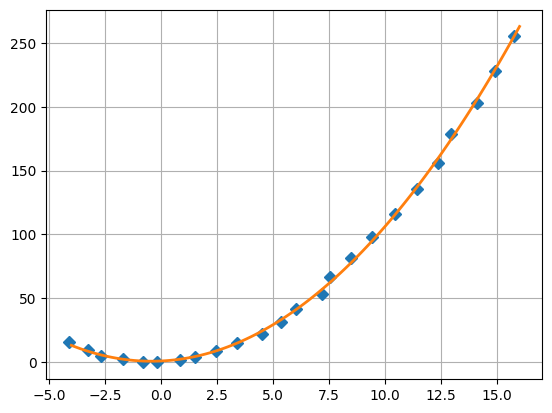

In [8]:
# Находим коэффициенты функции вида ax^2 + bx + c методом наименьших интерваолов
# Задаем вектор m = [x**2, x, E]
m = vstack((x ** 2, x, ones(dotCounter))).T
#Находим коэффициенты при составляющих вектора m
s = linalg.lstsq(m, y, rcond = None)[0]
# На отрезке [-4, 16]
x_prec = linspace(-4, 16, 101)

plt.plot(x, y, 'D')
plt.plot(x_prec, s[0] * x_prec ** 2 + s[1] * x_prec + s[2], '-', lw = 2)
plt.grid()

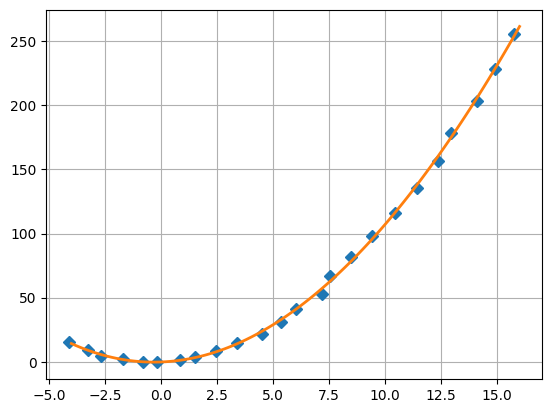

In [9]:
# Находим коэффициенты функции вида ax^2 + bx + c методом наименьших интерваолов
# Задаем вектор m = [x**2, x, E]
m = vstack((x ** 3, x ** 2, x, ones(dotCounter))).T
#Находим коэффициенты при составляющих вектора m
s = linalg.lstsq(m, y, rcond = None)[0]
# На отрезке [-4, 16]
x_prec = linspace(-4, 16, 101)

plt.plot(x, y, 'D')
plt.plot(x_prec, s[0] * x_prec ** 3 + s[1] * x_prec ** 2 + s[2] * x_prec + s[3], '-', lw = 2)
plt.grid()

### 1.1.4 Пример
Необходимо проверить гипотезу, что наши точечно заданная функция ложится
на кривую вида 𝑓(𝑥, 𝑏) = 𝑏0 + 𝑏1𝑒𝑥𝑝(−𝑏2𝑥^2)


[0.         0.10204082 0.20408163 0.30612245 0.40816327 0.51020408
 0.6122449  0.71428571 0.81632653 0.91836735 1.02040816 1.12244898
 1.2244898  1.32653061 1.42857143 1.53061224 1.63265306 1.73469388
 1.83673469 1.93877551 2.04081633 2.14285714 2.24489796 2.34693878
 2.44897959 2.55102041 2.65306122 2.75510204 2.85714286 2.95918367
 3.06122449 3.16326531 3.26530612 3.36734694 3.46938776 3.57142857
 3.67346939 3.7755102  3.87755102 3.97959184 4.08163265 4.18367347
 4.28571429 4.3877551  4.48979592 4.59183673 4.69387755 4.79591837
 4.89795918 5.        ]
[0.87976687 1.03849079 1.07566036 0.98674888 0.89415859 0.84264201
 0.92922857 0.80251489 0.74936606 0.66889604 0.61252312 0.59809305
 0.63805281 0.66408228 0.4996595  0.49416266 0.48617074 0.44727186
 0.40603162 0.40941712 0.34202628 0.30597969 0.24303654 0.21744001
 0.29797057 0.30622863 0.31309309 0.33639878 0.30245249 0.31766333
 0.33224801 0.22816046 0.27997383 0.28527482 0.23930293 0.17489287
 0.18286509 0.16316763 0.28759265 0.33

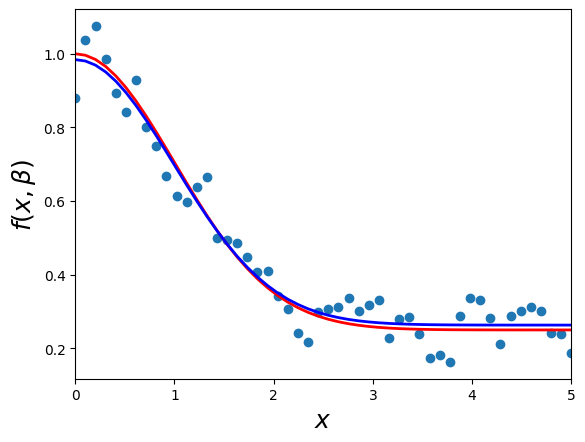

In [10]:
# Добавим шума в данные, сделанные по функции f(x, b) с коэффициентами b = (0.25, 0.75, 0.5)
beta = (0.25, 0.75, 0.5)
def f(x, b0, b1, b2):
    return b0 + b1 * np.exp(-b2 * x ** 2)
# Зададим массив точек xi
xdata = np.linspace(0, 5, 50)
# Создаем теоретически правильные значения точек yi (без шума)
y = f(xdata, *beta)
# Зашумляем эти данные 
ydata = y + 0.05 * np.random.randn(len(xdata))
print(xdata)
print(ydata)

# Используем функцию для получения решения в виде коэффициентов функции f(x) для указанных xdata и ydata
from scipy.optimize import curve_fit
beta_opt, beta_cov = curve_fit(f, xdata, ydata)
print(beta_opt)

# Вычислим линейное отклонение
lin_dev = sum(beta_cov[0])
print(lin_dev)

# Вычислим квадратичное отклонение
residuals = ydata - f(xdata, *beta_opt)
fres = sum(residuals ** 2)
print(fres)

fig, ax = plt.subplots()
ax.scatter(xdata, ydata)
ax.plot(xdata, y, 'r', lw=2)
ax.plot(xdata, f(xdata, *beta_opt), 'b', lw=2)
ax.set_xlim(0, 5)
ax.set_xlabel(r'$x$', fontsize=18)
ax.set_ylabel(r'$f(x, \beta)$', fontsize=18)
plt.show()

### 1.1.5 Пример
Необходимо проверить гипотезу, что наши точечно заданная функция ложится
на кривые вида:
1) 𝑓(𝑥, 𝑏) = 𝑏0 + 𝑏1𝑥
2) 𝑓(𝑥, 𝑏) = 𝑏0 + 𝑏1𝑥 + 𝑏2𝑥^2
3) 𝑓(𝑥, 𝑏) = 𝑏0 + 𝑏1𝑙𝑛(𝑥)
4) 𝑓(𝑥, 𝑏) = 𝑏0 𝑥^𝑏1


[0.24795456 0.75044378]
0.00011854496024447895
0.10423780827477891


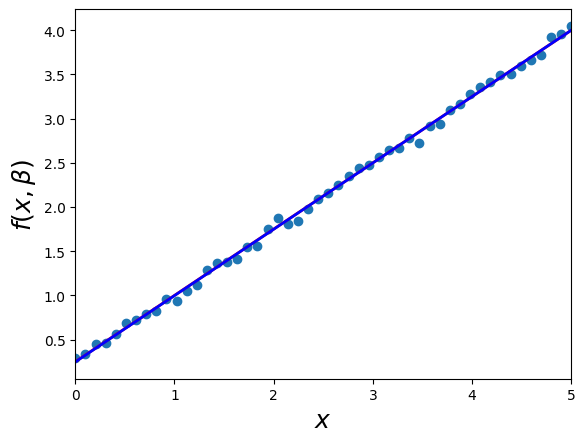

In [11]:
# 1
# Добавим шума в данные, сделанные по функции f(x, b) с коэффициентами b = (0.25, 0.75)
beta = (0.25, 0.75)
def f (x, b0, b1):
    return b0 + b1 * x
# Зададим массив точек xi 
xdata = np.linspace(0, 5, 50)
# Создаем теоретически правильные значения точек yi (без шума)
y = f(xdata, *beta)
# Зашумляем эти данные
ydata = y + 0.05 * np.random.randn(len(xdata))
beta_opt, beta_cov = curve_fit(f, xdata, ydata)
print(beta_opt)
# Вычислим линейное отклонение
lin_dev = sum(beta_cov[0])
print(lin_dev)

# Вычислимквадратичное отклонение
residuals = ydata - f(xdata, *beta_opt)
fres = sum(residuals ** 2)
print(fres)

fig, ax = plt.subplots()
ax.scatter(xdata, ydata)
ax.plot(xdata, y, 'r', lw=2)
ax.plot(xdata, f(xdata, *beta_opt), 'b', lw=2)
ax.set_xlim(0, 5)
ax.set_xlabel(r'$x$', fontsize=18)
ax.set_ylabel(r'$f(x, \beta)$', fontsize=18)
plt.show()

[0.247568   0.76104761 0.49737367]
0.00013038682094154784
0.10872895947717011


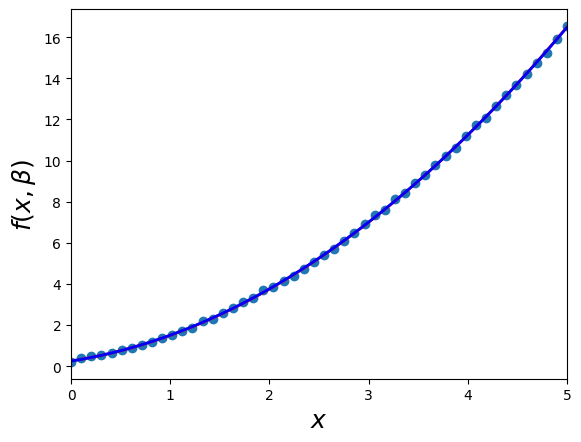

In [12]:
# 2
# Добавим шума в данные, сделанные по функции f(x, b) с коэффициентами b = (0.25, 0.75, 0.5)
beta = (0.25, 0.75, 0.5)
def f (x, b0, b1, b2):
    return b0 + b1 * x + b2 * x ** 2
# Зададим массив точек xi 
xdata = np.linspace(0, 5, 50)
# Создаем теоретически правильные значения точек yi (без шума)
y = f(xdata, *beta)
# Зашумляем эти данные
ydata = y + 0.05 * np.random.randn(len(xdata))
beta_opt, beta_cov = curve_fit(f, xdata, ydata)
print(beta_opt)
# Вычислим линейное отклонение
lin_dev = sum(beta_cov[0])
print(lin_dev)

# Вычислимквадратичное отклонение
residuals = ydata - f(xdata, *beta_opt)
fres = sum(residuals ** 2)
print(fres)

fig, ax = plt.subplots()
ax.scatter(xdata, ydata)
ax.plot(xdata, y, 'r', lw=2)
ax.plot(xdata, f(xdata, *beta_opt), 'b', lw=2)
ax.set_xlim(0, 5)
ax.set_xlabel(r'$x$', fontsize=18)
ax.set_ylabel(r'$f(x, \beta)$', fontsize=18)
plt.show()

[0.9986915  1.99922014]
5.657479757641842e-05
0.13082589890360752


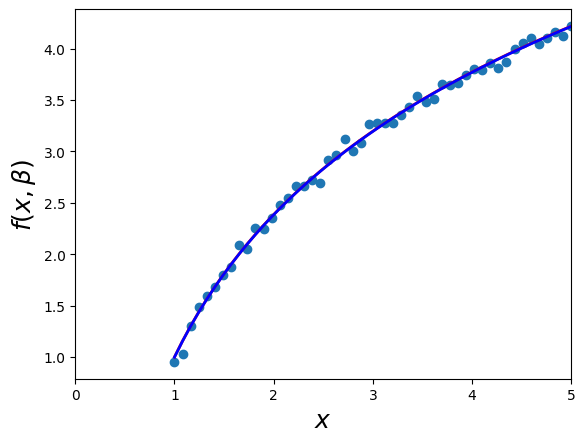

In [13]:
# 3
# Добавим шума в данные, сделанные по функции f(x, b) с коэффициентами b = (1, 2)
beta = (1, 2)
def f (x, b0, b1):
    return b0 + b1 * np.log(x)
# Зададим массив точек xi 
xdata = np.linspace(1, 5, 50)
# Создаем теоретически правильные значения точек yi (без шума)
y = f(xdata, *beta)
# Зашумляем эти данные
ydata = y + 0.05 * np.random.randn(len(xdata))
beta_opt, beta_cov = curve_fit(f, xdata, ydata)
print(beta_opt)
# Вычислим линейное отклонение
lin_dev = sum(beta_cov[0])
print(lin_dev)

# Вычислимквадратичное отклонение
residuals = ydata - f(xdata, *beta_opt)
fres = sum(residuals ** 2)
print(fres)

fig, ax = plt.subplots()
ax.scatter(xdata, ydata)
ax.plot(xdata, y, 'r', lw=2)
ax.plot(xdata, f(xdata, *beta_opt), 'b', lw=2)
ax.set_xlim(0, 5)
ax.set_xlabel(r'$x$', fontsize=18)
ax.set_ylabel(r'$f(x, \beta)$', fontsize=18)
plt.show()

[1.00210108 1.99994809]
8.794402055312903e-05
0.09808175335134008


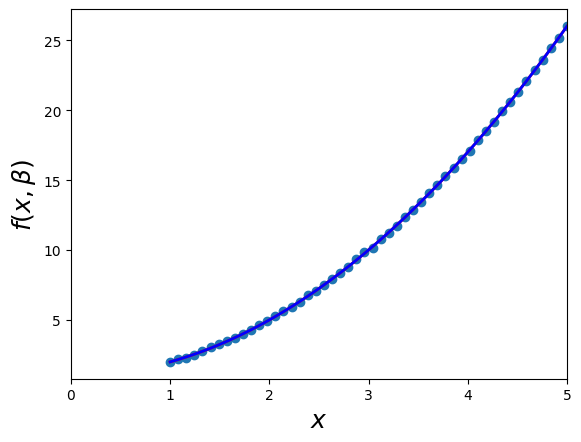

In [14]:
# 4
# Добавим шума в данные, сделанные по функции f(x, b) с коэффициентами b = (1, 2)
beta = (1, 2)
def f (x, b0, b1):
    return b0 + x ** b1
# Зададим массив точек xi 
xdata = np.linspace(1, 5, 50)
# Создаем теоретически правильные значения точек yi (без шума)
y = f(xdata, *beta)
# Зашумляем эти данные
ydata = y + 0.05 * np.random.randn(len(xdata))
beta_opt, beta_cov = curve_fit(f, xdata, ydata)
print(beta_opt)
# Вычислим линейное отклонение
lin_dev = sum(beta_cov[0])
print(lin_dev)

# Вычислимквадратичное отклонение
residuals = ydata - f(xdata, *beta_opt)
fres = sum(residuals ** 2)
print(fres)

fig, ax = plt.subplots()
ax.scatter(xdata, ydata)
ax.plot(xdata, y, 'r', lw=2)
ax.plot(xdata, f(xdata, *beta_opt), 'b', lw=2)
ax.set_xlim(0, 5)
ax.set_xlabel(r'$x$', fontsize=18)
ax.set_ylabel(r'$f(x, \beta)$', fontsize=18)
plt.show()

### 1.1.5 Задание
Подставьте собственные данные и поэкспериментируйте с представленными
функциями. Проанализируйте динамику изменения данных.


[1.99621878 0.59840063]
0.00015189736037369745
0.05468304999873372


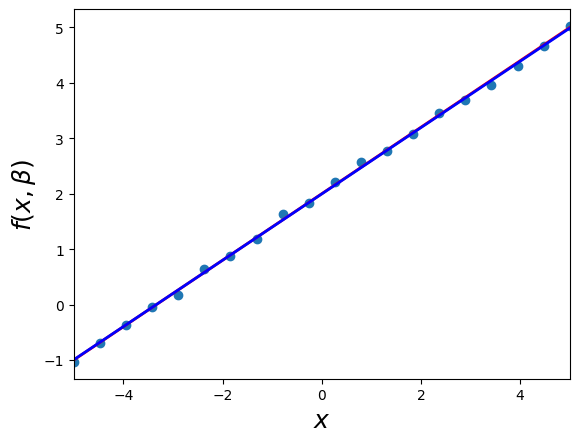

In [15]:
# 1
# Добавим шума в данные, сделанные по функции f(x, b) с коэффициентами b = (2, 0.6)
beta = (2, 0.6)
def f (x, b0, b1):
    return b0 + b1 * x
# Зададим массив точек xi 
xdata = np.linspace(-5, 5, 20)
# Создаем теоретически правильные значения точек yi (без шума)
y = f(xdata, *beta)
# Зашумляем эти данные
ydata = y + 0.05 * np.random.randn(len(xdata))
beta_opt, beta_cov = curve_fit(f, xdata, ydata)
print(beta_opt)
# Вычислим линейное отклонение
lin_dev = sum(beta_cov[0])
print(lin_dev)

# Вычислимквадратичное отклонение
residuals = ydata - f(xdata, *beta_opt)
fres = sum(residuals ** 2)
print(fres)

fig, ax = plt.subplots()
ax.scatter(xdata, ydata)
ax.plot(xdata, y, 'r', lw=2)
ax.plot(xdata, f(xdata, *beta_opt), 'b', lw=2)
ax.set_xlim(-5, 5)
ax.set_xlabel(r'$x$', fontsize=18)
ax.set_ylabel(r'$f(x, \beta)$', fontsize=18)
plt.show()

[2.30112607e+01 2.22689731e-01 9.25421882e-03]
0.0001080994702484846
0.0758449547839655


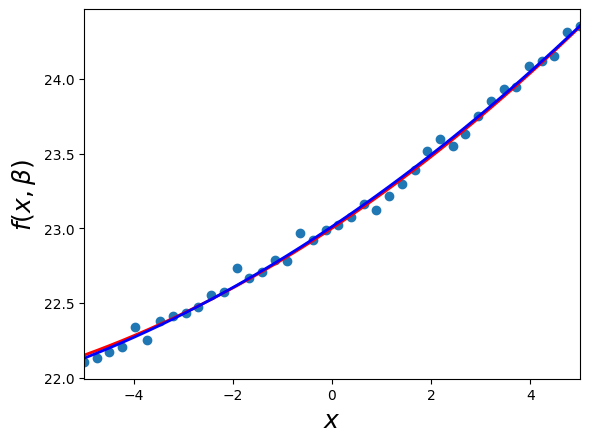

In [16]:
# 2
# Добавим шума в данные, сделанные по функции f(x, b) с коэффициентами b = (23, 0.22, 0.01)
beta = (23, 0.22, 0.01)
def f (x, b0, b1, b2):
    return b0 + b1 * x + b2 * x ** 2
# Зададим массив точек xi 
xdata = np.linspace(-5, 5, 40)
# Создаем теоретически правильные значения точек yi (без шума)
y = f(xdata, *beta)
# Зашумляем эти данные
ydata = y + 0.05 * np.random.randn(len(xdata))
beta_opt, beta_cov = curve_fit(f, xdata, ydata)
print(beta_opt)
# Вычислим линейное отклонение
lin_dev = sum(beta_cov[0])
print(lin_dev)

# Вычислимквадратичное отклонение
residuals = ydata - f(xdata, *beta_opt)
fres = sum(residuals ** 2)
print(fres)

fig, ax = plt.subplots()
ax.scatter(xdata, ydata)
ax.plot(xdata, y, 'r', lw=2)
ax.plot(xdata, f(xdata, *beta_opt), 'b', lw=2)
ax.set_xlim(-5, 5)
ax.set_xlabel(r'$x$', fontsize=18)
ax.set_ylabel(r'$f(x, \beta)$', fontsize=18)
plt.show()

[ 4.11077320e-03 -5.00261812e+00]
8.700493056153383e-06
2.4748827657936694


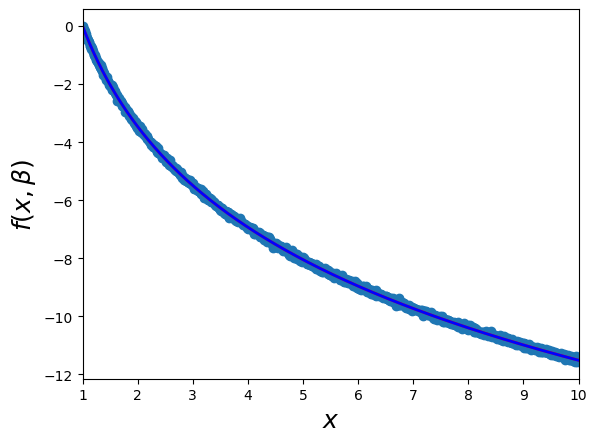

In [17]:
# 3
# Добавим шума в данные, сделанные по функции f(x, b) с коэффициентами b = (0, -5)
beta = (0, -5)
def f (x, b0, b1):
    return b0 + b1 * np.log(x)
# Зададим массив точек xi 
xdata = np.linspace(1, 10, 1000)
# Создаем теоретически правильные значения точек yi (без шума)
y = f(xdata, *beta)
# Зашумляем эти данные
ydata = y + 0.05 * np.random.randn(len(xdata))
beta_opt, beta_cov = curve_fit(f, xdata, ydata)
print(beta_opt)
# Вычислим линейное отклонение
lin_dev = sum(beta_cov[0])
print(lin_dev)

# Вычислимквадратичное отклонение
residuals = ydata - f(xdata, *beta_opt)
fres = sum(residuals ** 2)
print(fres)

fig, ax = plt.subplots()
ax.scatter(xdata, ydata)
ax.plot(xdata, y, 'r', lw=2)
ax.plot(xdata, f(xdata, *beta_opt), 'b', lw=2)
ax.set_xlim(1, 10)
ax.set_xlabel(r'$x$', fontsize=18)
ax.set_ylabel(r'$f(x, \beta)$', fontsize=18)
plt.show()

[13.98668641  2.75985658]
-0.00016100982507508287
0.204907822606479


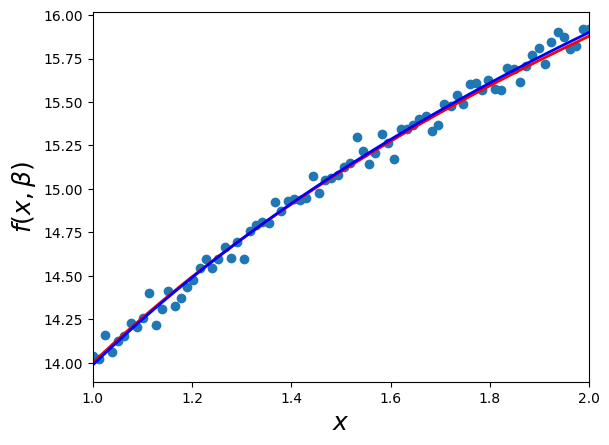

In [18]:
# 4
# Добавим шума в данные, сделанные по функции f(x, b) с коэффициентами b = (2, 0.6)
beta = (14, 2.71)
def f (x, b0, b1):
    return b0 + b1 * np.log(x)
# Зададим массив точек xi 
xdata = np.linspace(1, 2, 80)
# Создаем теоретически правильные значения точек yi (без шума)
y = f(xdata, *beta)
# Зашумляем эти данные
ydata = y + 0.05 * np.random.randn(len(xdata))
beta_opt, beta_cov = curve_fit(f, xdata, ydata)
print(beta_opt)
# Вычислим линейное отклонение
lin_dev = sum(beta_cov[0])
print(lin_dev)

# Вычислимквадратичное отклонение
residuals = ydata - f(xdata, *beta_opt)
fres = sum(residuals ** 2)
print(fres)

fig, ax = plt.subplots()
ax.scatter(xdata, ydata)
ax.plot(xdata, y, 'r', lw=2)
ax.plot(xdata, f(xdata, *beta_opt), 'b', lw=2)
ax.set_xlim(1, 2)
ax.set_xlabel(r'$x$', fontsize=18)
ax.set_ylabel(r'$f(x, \beta)$', fontsize=18)
plt.show()

### 1.2.1 Пример
Построим простую линейную регрессию в Python с использованием
библиотеки scikit-learn


In [19]:
# Импортируем необходимые библиотеки
# Используем pandas и numpy для обработки данных
# matplotlib для визуализации и sklearn для обучения наборов данных и импорта моделей
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
from pandas import DataFrame, Series
from sklearn.model_selection import train_test_split
from sklearn.linear_model import LinearRegression

# Созадим набор данных для описания взаимосвязи между временем обучения студентов и успеваемостью
my_dict = {'Учебное время': [0.50, 0.75, 1.00, 1.25, 1.50, 1.75, 1.75, 2.00, 2.25, 2.50, 2.75, 3.00, 3.25, 3.50, 4.00, 4.25, 4.50, 4.75, 5.00, 5.50],
           'Оценка' : [10, 22, 13, 43, 20, 22, 33, 50, 62, 48, 55, 75, 62, 73, 81, 76, 64, 82, 90, 93]}

dataset = pd.DataFrame(my_dict)
dataset.head()


,Учебное время,Оценка
0,0.50,10
1,0.75,22
2,1.00,13
3,1.25,43
4,1.50,20


In [20]:
# Исследуем набор данных 
print(dataset.shape)
dataset.describe()

(20, 2)


,Учебное время,Оценка
count,20.000000,20.000000
mean,2.787500,53.700000
std,1.507165,26.435821
min,0.500000,10.000000
25%,1.687500,30.250000
50%,2.625000,58.500000
75%,4.062500,75.250000
max,5.500000,93.000000


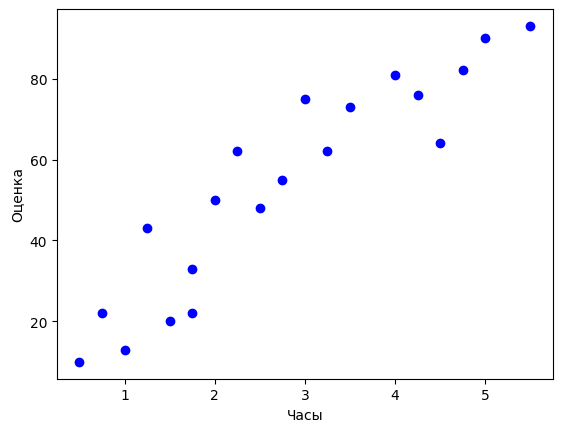

In [21]:
# Нарисуем точечную диаграмму
plt.scatter(dataset['Учебное время'], dataset['Оценка'], color='b', label='данные экзамена')
plt.xlabel('Часы')
plt.ylabel('Оценка')
plt.show()

In [23]:
# Разделим информацию на "атрибуты" и "метки"
x = dataset.iloc[:, :-1].values
y = dataset.iloc[:, 1].values
print(x)
print(y)

[[0.5 ]
 [0.75]
 [1.  ]
 [1.25]
 [1.5 ]
 [1.75]
 [1.75]
 [2.  ]
 [2.25]
 [2.5 ]
 [2.75]
 [3.  ]
 [3.25]
 [3.5 ]
 [4.  ]
 [4.25]
 [4.5 ]
 [4.75]
 [5.  ]
 [5.5 ]]
[10 22 13 43 20 22 33 50 62 48 55 75 62 73 81 76 64 82 90 93]


In [27]:
# Теперь, когда у нас есть атрмибуты и метки, необходимо разделить из на обучающий и тестовый наборы
# Приведенный фрагмент разделяет 80% данных на обучающий набор, а 20% - на набор тестов
x_train, x_test, y_train, y_test = train_test_split(x, y, test_size=0.2, random_state=0)

# Далее можно обучить алгоритм линейной регрессии
# Необходимо импортировать класс LinearRegression, создать его экземпляр и вызвать метод fit()
regression = LinearRegression()
regression.fit(x_train, y_train)

# Подведем поучившиеся коэффициенты для линии регрессии
print(regression.intercept_)
print(regression.coef_)

5.475400029908791
[17.02706744]


Получившийся результат можно интерпретировать следующим образом: с
каждым затраченным часом на обучение результат экзамена повышается
приблизительно на 17 баллов. Далее можно построить прогнозы. Для этого мы
будем использовать наши тестовые данные и посмотрим, насколько точно наш
алгоритм предсказывает процентную оценку.

In [28]:
y_pred = regression.predict(x_test)
# сравним фактические значения с прогнозируемыми
df = pd.DataFrame({'Actual': y_test, 'Predicted': y_pred})
df

,Actual,Predicted
0,90,90.610737
1,22,18.245701
2,93,99.124271
3,62,43.786302


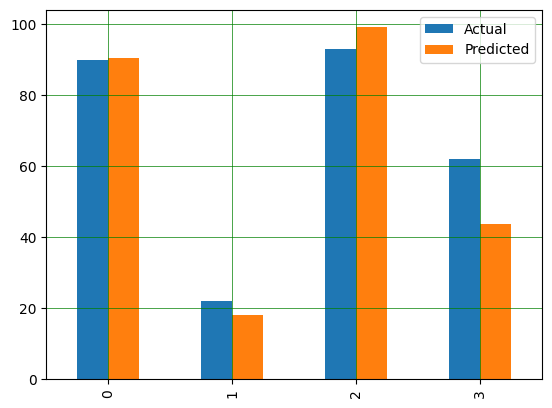

In [30]:
# визуализируем результат сравнения в виде гистограммы
df.plot(kind='bar')
plt.grid(which='major', linestyle='-', linewidth='0.5', color='green')
plt.grid(which='minor', linestyle=':', linewidth='0.5', color='black')
plt.show()

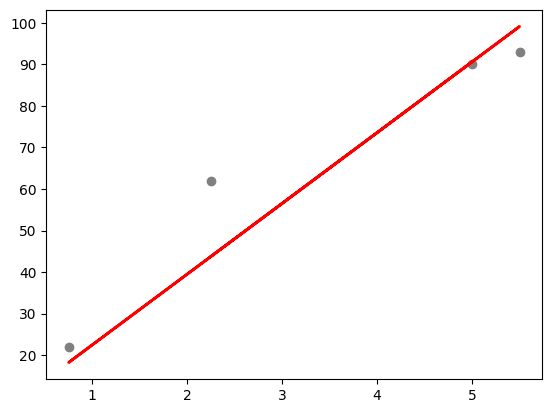

In [32]:
# Посмотрим линию регрессии с тестовыми данными
plt.scatter(x_test, y_test, color='gray')
plt.plot(x_test, y_pred, color='red', linewidth=2)

### 1.2.1 Задание
Постройте модель линейной регрессии для произвольных данных из двух
столбцов. Для примера можно взять точечную зависимость заработной платы от
опыта работы:
(https://raw.githubusercontent.com/AnnaShestova/salary-years-simple-linear-regression/master/Salary_Data.csv).
Найдите коэффициенты линии регрессии. Постройте прогноз.

26780.09915062818
[9312.57512673]


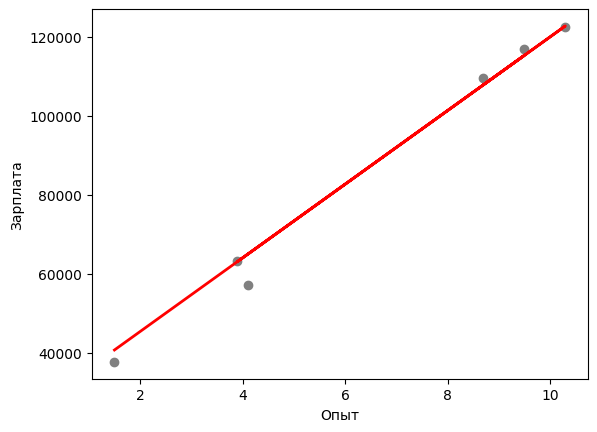

In [41]:
# Загрузить данные
url = 'https://raw.githubusercontent.com/AnnaShestova/salary-years-simple-linear-regression/master/Salary_Data.csv'
datafame = pd.read_csv(url)

# Рвзделим данные на "атрибуты" и "метки"
x = datafame.iloc[:, :-1].values
y = datafame.iloc[:, 1].values

# Разделим данные на обучающий набор (80%) и тестовый набор (20%)
x_train, x_test, y_train, y_test = train_test_split(x, y, test_size=0.2, random_state=0)

# Обучим алгоритм линейной регрессии
regression = LinearRegression().fit(x_train, y_train)

# Коэффициенты для линии регрессии
print(regression.intercept_)
print(regression.coef_)

# Построим предсказание
y_pred = regression.predict(x_test)
plt.xlabel('Опыт')
plt.ylabel('Зарплата')
plt.scatter(x_test, y_test, color='gray')
plt.plot(x_test, y_pred, color='red', linewidth=2)
plt.show()




### 1.3.1 Пример
Для решения задачи множественной регрессии можно задействовать уже
известный метод numpy.linalg.lstsq.

In [43]:
import numpy as np

y = [1, 2, 3, 4, 3, 4, 5, 3, 5, 5, 4, 5, 4, 5, 4, 5, 6, 0, 6, 3, 1, 3, 1]
x = [[0, 2, 4, 1, 5, 4, 5, 9, 9, 9, 3, 7, 8, 8, 6, 6, 5, 5, 5, 6, 6, 5, 5],
     [4, 1, 2, 3, 4, 5, 6, 7, 5, 8, 7, 8, 7, 8, 7, 8, 6, 8, 9, 2, 1, 5, 6],
     [4, 1, 2, 5, 6, 7, 8, 9, 7, 8, 7, 8, 7, 4, 3, 1, 2, 3, 4, 1, 3, 9, 7]]
x = np.transpose(x) # транспонировать входной вектор
x = np.c_[x, np. ones(x.shape[0])] # и наклон смещения
linreg = np.linalg.lstsq(x, y, rcond=None)[0]
print(linreg)

[ 0.1338682   0.26840334 -0.02874936  1.5122571 ]


### 1.3.2 Пример
Для данных из предыдущей задачи построить модель множественной
линейной регрессии с использованием средств библиотеки sсikit-learn.

In [48]:
# Импортируем необходимые библиотеки
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as seabornInstance
from sklearn.model_selection import train_test_split
from sklearn.linear_model import LinearRegression
from sklearn import metrics

y = [1, 2, 3, 4, 3, 4, 5, 3, 5, 5, 4, 5, 4, 5, 4, 5, 6, 0, 6, 3, 1, 3, 1]
x = [[0, 2, 4, 1, 5, 4, 5, 9, 9, 9, 3, 7, 8, 8, 6, 6, 5, 5, 5, 6, 6, 5, 5],
     [4, 1, 2, 3, 4, 5, 6, 7, 5, 8, 7, 8, 7, 8, 7, 8, 6, 8, 9, 2, 1, 5, 6],
     [4, 1, 2, 5, 6, 7, 8, 9, 7, 8, 7, 8, 7, 4, 3, 1, 2, 3, 4, 1, 3, 9, 7]]

# Формируем DataFrame из двух списков
new_y = np.array(y)
new_y = new_y.transpose()
df1 = pd.DataFrame(new_y)
new_x = np.array(x)
new_x = new_x.transpose()
df2 = pd.DataFrame(new_x)
df1 = df1.rename(columns= {0: 'y'}, inplace=False)
df2 = df2.rename(columns={0: 'x1', 1: 'x2', 2: 'x3'}, inplace=False)

frames = [df1, df2]
dataset = pd.concat([df1, df2], axis=1, join='inner')
dataset.head()

,y,x1,x2,x3
0,1,0,4,4
1,2,2,1,1
2,3,4,2,2
3,4,1,3,5
4,3,5,4,6


In [53]:
# Изучим данные
print(dataset.shape)
dataset.describe()

(23, 4)


,y,x1,x2,x3
count,23.000000,23.000000,23.000000,23.000000
mean,3.565217,5.347826,5.521739,5.043478
std,1.674029,2.404706,2.428422,2.704849
min,0.000000,0.000000,1.000000,1.000000
25%,3.000000,4.500000,4.000000,3.000000
50%,4.000000,5.000000,6.000000,5.000000
75%,5.000000,6.500000,7.500000,7.000000
max,6.000000,9.000000,9.000000,9.000000


In [50]:
# Разделим данные на метки и атрибуты
x = dataset[['x1', 'x2', 'x3']]
y = dataset['y']

# Разделим данные на обучающую и тестовую выборки
x_train, x_test, y_train, y_test = train_test_split(x, y, test_size=0.2, random_state=0)

# Для обучения алгоритма мы выполняем тотже код, что и раньше, используя метод fit() класса LinearRegression
regression = LinearRegression()
regression.fit(x_train, y_train)

# Выведем коэффициенты модели
coeff_df = pd.DataFrame(regression.coef_, x.columns, columns=['Coefficient'])
coeff_df

,Coefficient
x1,0.223219
x2,0.136709
x3,-0.063757


In [55]:
# Сделать прогноз на тестовых данных
y_pred = regression.predict(x_test)
df = pd.DataFrame({'Actual': y_test, 'Predicted': y_pred})
df                  

,Actual,Predicted
11,5,4.119478
10,4,3.153648
21,3,3.199155
14,4,4.078333
20,1,3.258079


In [56]:
# Оценить производительность алгоритма. Найдем значение для MSE
print('Mean Squared Error: ', metrics.mean_squared_error(y_test, y_pred))

Mean Squared Error:  1.3272699242343065


### 1.3.2 Задание
Постройте модель множественной линейной регрессии для произвольных
данных из нескольких столбцов. Для примера можно взять потребления
газа (в миллионах галлонов) в 48 штатах США или набор данных о
качестве красного вина (1) и (2) соответственно. Найдите коэффициенты
множественной регрессии. Постройте прогноз.

1. https://raw.githubusercontent.com/likarajo/petrol_consumption/master/data/petrol_consumption.csv 
2. https://raw.githubusercontent.com/aniruddhachoudhury/Red-Wine-Quality/master/winequality-red.csv

In [79]:
# Загрузить данные
url = 'https://raw.githubusercontent.com/aniruddhachoudhury/Red-Wine-Quality/master/winequality-red.csv'
datafame = pd.read_csv(url)

# Формируем DataFrame из двух списков
x = datafame.iloc[:, :-1].values
y = datafame.iloc[:, 1].values
df1 = pd.DataFrame(y).rename(columns={0: 'quality'}, inplace=False)
df2 = pd.DataFrame(x).rename(columns={0: 'fixed acidity', 1: 'volatile acidity', 2: 'citric acid', 3: 'residual sugar', 4: 'chlorides', 5: 'free sulfur dioxide', 6: 'total sulfur dioxide', 7: 'density', 8: 'pH', 9: 'sulphates', 10: 'alcohol'}, inplace=False)
frames = [df1, df2]
dataset = pd.concat([df1, df2], axis=1, join='inner')

# Разделим данные на метки и атрибуты
x = dataset[['fixed acidity', 'volatile acidity', 'citric acid', 'residual sugar', 'chlorides', 'free sulfur dioxide', 'total sulfur dioxide', 'density', 'pH', 'sulphates', 'alcohol']]
y = dataset['quality']

# Разделим данные на обучающую и тестовую выборки
x_train, x_test, y_train, y_test = train_test_split(x, y, test_size=0.2, random_state=0)

# Для обучения алгоритма мы выполняем тотже код, что и раньше, используя метод fit() класса LinearRegression
regression = LinearRegression()
regression.fit(x_train, y_train)

# Выведем коэффициенты модели
coeff_df = pd.DataFrame(regression.coef_, x.columns, columns=['Coefficient'])
coeff_df


,Coefficient
fixed acidity,5.936245e-18
volatile acidity,1.000000e+00
citric acid,-9.676288e-15
residual sugar,1.471046e-15
chlorides,1.137762e-15
free sulfur dioxide,-2.220446e-16
total sulfur dioxide,0.000000e+00
density,8.963587e-15
pH,-1.283695e-16
sulphates,-5.117434e-17


In [80]:
# Сделать прогноз на тестовых данных
y_pred = regression.predict(x_test)
df = pd.DataFrame({'Actual': y_test, 'Predicted': y_pred})
df   

,Actual,Predicted
1109,0.470,0.470
1032,0.820,0.820
1002,0.290,0.290
487,0.645,0.645
979,0.450,0.450
...,...,...
794,0.270,0.270
813,0.390,0.390
1322,0.340,0.340
704,0.765,0.765


### 1.3.2 Задание
Экспериментально получены N − значений величины Y при
различных значениях величины X. Построить полиномы первой и второй
степени, аппроксимирующие результаты эксперимента, с применением
метода наименьших квадратов. Результаты выводятся в виде таблиц
значений и графиков, полученных полиномов.

In [91]:
# Входные данные. Вариант 9
x = np.array([2.0, 2.2, 2.4, 2.6, 2.8, 3.0])
y = np.array([4.0, 2.0, 4.0, 2.0, 5.0, 2.0])

In [109]:
# Полином первой степени
# Перепишем линейное уравнение y = mx + c как y = Ap, где A = [[ x 1]] и p = [[m], [c]]
# Построим A по x:
A = np.vstack([x, np.ones(len(x))]).T

# Используем метод lstsq для решения его относительно вектора p
m, c = np.linalg.lstsq(A, y, rcond=None)[0]

# Построим таблицу полученных результатов
dataset = {'y': y, 'y_prec': [m * i + c for i in x]}
df = pd.DataFrame(dataset)
df

,y,y_prec
0,4.0,3.380952
1,2.0,3.295238
2,4.0,3.209524
3,2.0,3.123810
4,5.0,3.038095
5,2.0,2.952381


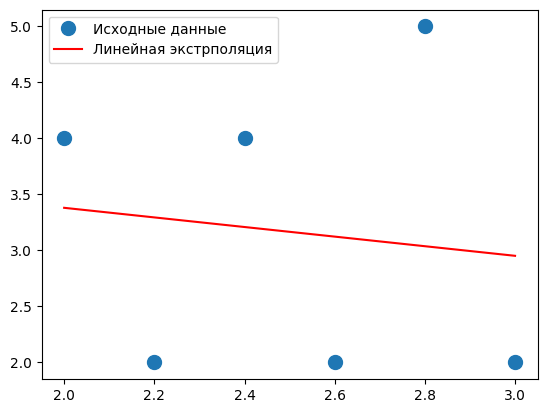

In [98]:

# Построим график полученной прямой и укажем на нем точки
plt.plot(x, y, 'o', label='Исходные данные', markersize=10)
plt.plot(x, m * x + c, 'r', label='Линейная экстрполяция')
plt.legend()
plt.show()

In [111]:
# Полином второй степени
# Нахождение коэффициентов функции вида y = ax^2 + bx + c методом наименьших квадратов
# Задаем вектор m = [x**2, x, E]
m = np.vstack([x ** 2, x, np.ones(len(x))]).T

# Находим коэффициенты при составляющих вектора m
s = np.linalg.lstsq(m, y, rcond = None)[0]

# Построим таблицу полученных результатов
dataset = {'y': y, 'y_prec': [s[0] * i ** 2 + s[1] * i + s[2] for i in x]}
df = pd.DataFrame(dataset)
df

,y,y_prec
0,4.0,3.321429
1,2.0,3.307143
2,4.0,3.257143
3,2.0,3.171429
4,5.0,3.050000
5,2.0,2.892857


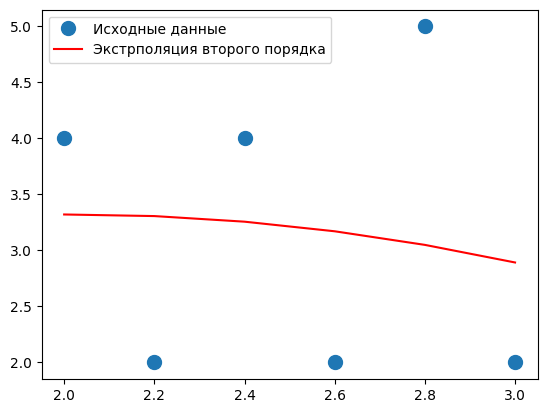

In [112]:
# Построим график полученной прямой и укажем на нем точки
plt.plot(x, y, 'o', label='Исходные данные', markersize=10)
plt.plot(x, s[0] * x ** 2 + s[1] * x + s[2], 'r', label='Экстрполяция второго порядка')
plt.legend()
plt.show()